In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame, concat
from google.colab import drive
drive.mount('/content/drive')
from datetime import date
import time
from sklearn.model_selection import train_test_split
import os
import math
from math import radians
from sklearn.preprocessing import MinMaxScaler

Mounted at /content/drive


In [2]:
import numpy as np
from scipy.optimize import curve_fit
import pylab
import math

In [4]:
# 데이터 불러오기

raw_data = pd.read_csv('/content/drive/MyDrive/submission_paramtry.csv')
submission = pd.read_csv('/content/drive/MyDrive/Jupyter/Dacon/unlimited_power/raw_data/sample_submission.csv')

In [5]:
dataset = raw_data.copy()

In [6]:
# 만약에 안 불러오고 LGBM 끝에 붙인다면, 적당히 수정해서 여기부터 돌리면 됨.
# 일단 input은 다음과 같은 모양(인덱스, 칼럼으로 만들고 시작하기를 추천, 안 그러면 for 문에서 오류 발생)

dataset.set_index('id', inplace = True)
dataset.head(2)

q_0.1  q_0.2  q_0.3  q_0.4  q_0.5  q_0.6  q_0.7  q_0.8  q_0.9
id                                                                             
0.csv_Day7_0h00m    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0
0.csv_Day7_0h30m    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0

In [7]:
# columns_IDA는 상하로 맞춰줌
# rows_IDA는 좌우로 맞춰줌
# 상하 > 좌우 & 좌우 > 상하를 비교한 결과 좌우로 먼저 맞춘 다음에 상하를 맞추는 것이 쬐------끔 좋은 결과를 보임.

# 그래서 rows_IDA 먼저 하고 columns_IDA 추천


def columns_IDA(dataset):
  dataset2 = pd.DataFrame()
  for j in range(0,9):
    new_val = []
    for m in range(1, int(raw_data.shape[0]/48)+1):
      temp = dataset.iloc[48*(m-1):48*m,j].values

      strt = 0
      endd = 0
      k = 0

      for i in range(len(temp)):
        if temp[i] > k and k ==0 and i < 24:
          strt = i
        elif temp[i] < k and temp[i] == 0 and i > 24:
          endd = i
        k = temp[i]

      bf = temp[:strt+1]
      y = temp[strt+1:endd-1]
      af = temp[endd-1:]
      # bf = temp[:strt]
      # y = temp[strt:endd]
      # af = temp[endd:]

      x = np.array([i for i in range(len(y))])
      fit_t = np.polyfit(x,y,5)

      for i in x:
        fit1 = fit_t[0]*x**5 + fit_t[1]*x**4 + fit_t[2]*x**3 + fit_t[3]*x**2 + fit_t[4]*x + fit_t[5]
    # fit1 = fit_t[0]*x**4 + fit_t[1]*x**3 + fit_t[2]*x**2 + fit_t[3]*x + fit_t[4]
    # fit1 = fit_t[0]*x**2 + fit_t[1]*x + fit_t[2]

      revised = np.concatenate((bf, fit1, af), axis=0)
      new_val.extend(list(revised))
    k = pd.DataFrame(new_val)
    dataset2 = pd.concat([dataset2, k], axis = 1)
  return dataset2

In [8]:
def not_minus(dataset):
  for i in range(0, len(dataset.index)):
    for j in range(0, len(dataset.columns)):
      K = dataset.iloc[i,j]
      if K < 0.09:
        dataset.iloc[i,j] = 0
  return dataset

In [9]:
def f(x, a,b,c, d):
  y = 1/3 * b * x**3 - a*b *x**2 + (a**2*b + b*c**2)*x + d
  # y = a*(x-12*a) * x **2 + c
  # y = a*x**2 + b
  return y

def rows_IDA(dataset):
  revised = pd.DataFrame()
  for i in range(dataset.shape[0]):
    y = dataset.iloc[i,:].values
    y = np.array(list(y))
    x = np.array([i for i in range(len(y))])

    if list(y).count(0) <= 5 :
      popt, pcov = curve_fit(f, x, y, maxfev = 999990000)
      yfit = f(x, *popt)
      revised = pd.concat([revised, pd.DataFrame(yfit).transpose()], axis = 0)
    else:
      revised = pd.concat([revised, pd.DataFrame(y).transpose()], axis = 0)
    if i % 100 == 0:
      print(i, '/7776')
  return revised

In [10]:
test = rows_IDA(dataset)
dataset2 = not_minus(test)

0 /7776


/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


100 /7776
200 /7776
300 /7776
400 /7776
500 /7776
600 /7776
700 /7776
800 /7776
900 /7776
1000 /7776
1100 /7776
1200 /7776
1300 /7776
1400 /7776
1500 /7776
1600 /7776
1700 /7776
1800 /7776
1900 /7776
2000 /7776
2100 /7776
2200 /7776
2300 /7776
2400 /7776
2500 /7776
2600 /7776
2700 /7776
2800 /7776
2900 /7776
3000 /7776
3100 /7776
3200 /7776
3300 /7776
3400 /7776
3500 /7776
3600 /7776
3700 /7776
3800 /7776
3900 /7776
4000 /7776
4100 /7776
4200 /7776
4300 /7776
4400 /7776
4500 /7776
4600 /7776
4700 /7776
4800 /7776
4900 /7776
5000 /7776
5100 /7776
5200 /7776
5300 /7776
5400 /7776
5500 /7776
5600 /7776
5700 /7776
5800 /7776
5900 /7776
6000 /7776
6100 /7776
6200 /7776
6300 /7776
6400 /7776
6500 /7776
6600 /7776
6700 /7776
6800 /7776
6900 /7776
7000 /7776
7100 /7776
7200 /7776
7300 /7776
7400 /7776
7500 /7776
7600 /7776
7700 /7776


In [11]:
dataset3 = pd.DataFrame(dataset2.values, columns = dataset.columns, index = dataset.index)

In [12]:
dataset3

q_0.1  q_0.2  q_0.3  q_0.4  ...  q_0.6  q_0.7  q_0.8  q_0.9
id                                              ...                            
0.csv_Day7_0h00m      0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0
0.csv_Day7_0h30m      0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0
0.csv_Day7_1h00m      0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0
0.csv_Day7_1h30m      0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0
0.csv_Day7_2h00m      0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0
...                   ...    ...    ...    ...  ...    ...    ...    ...    ...
80.csv_Day8_21h30m    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0
80.csv_Day8_22h00m    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0
80.csv_Day8_22h30m    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0
80.csv_Day8_23h00m    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0
80.csv_Day8_23h30m    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0

[7776 rows x 9 columns]

In [13]:
# submission2 = pd.DataFrame(submission.iloc[:,0])
dataset4 = columns_IDA(dataset3)
# submission3 = pd.concat([submission2, dataset2], axis = 1)

In [14]:
dataset5 = pd.DataFrame(dataset4.values, columns = dataset.columns, index = dataset.index)

In [15]:
dataset5

q_0.1  q_0.2  q_0.3  q_0.4  ...  q_0.6  q_0.7  q_0.8  q_0.9
id                                              ...                            
0.csv_Day7_0h00m      0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0
0.csv_Day7_0h30m      0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0
0.csv_Day7_1h00m      0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0
0.csv_Day7_1h30m      0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0
0.csv_Day7_2h00m      0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0
...                   ...    ...    ...    ...  ...    ...    ...    ...    ...
80.csv_Day8_21h30m    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0
80.csv_Day8_22h00m    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0
80.csv_Day8_22h30m    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0
80.csv_Day8_23h00m    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0
80.csv_Day8_23h30m    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0

[7776 rows x 9 columns]

In [16]:
submission2 = not_minus(dataset5)

In [17]:
submission2.to_csv('row_first.csv')
!cp row_first.csv "drive/My Drive/"

In [ ]:
### 아래는 시각화

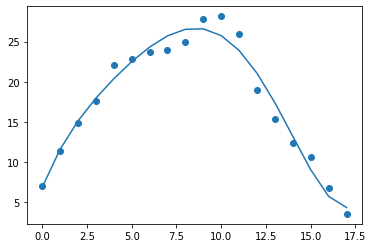

In [ ]:
dataset = raw_data.copy()
dataset2 = pd.DataFrame()

m = 5
j = 1

new_val = []

temp = dataset.iloc[48*(m-1):48*m,j].values

strt = 0
endd = 0
k = 0

for i in range(len(temp)):
  if temp[i] > k and k ==0 and i < 24:
    strt = i
  elif temp[i] < k and temp[i] == 0 and i > 24:
    endd = i
  k = temp[i]

bf = temp[:strt+1]
y = temp[strt+1:endd-1]
af = temp[endd-1:]
# bf = temp[:strt]
# y = temp[strt:endd]
# af = temp[endd:]

x = np.array([i for i in range(len(y))])
fit_t = np.polyfit(x,y,5)

for i in x:
  fit1 = fit_t[0]*x**5 + fit_t[1]*x**4 + fit_t[2]*x**3 + fit_t[3]*x**2 + fit_t[4]*x + fit_t[5]

plt.scatter(x,y)
plt.plot(x,fit1)
plt.show()

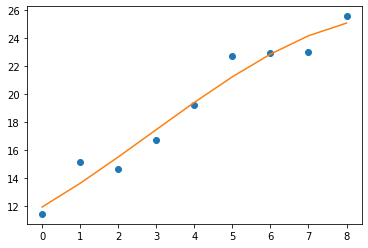

In [ ]:
# yexact =  (1 + math.erf((x-mu)/alpha * math.sqrt(2))) * ya
y = dataset.iloc[18,1:].values
x = np.array([i for i in range(len(y))])

y = np.array(list(y))

def f(x, a,b,c, d):
  y = 1/3 * b * x**3 - a*b *x**2 + (a**2*b + c**2)*x + d
  # y = a*(x-12*a) * x **2 + c
  # y = a*x**2 + b
  return y

def rms(y, yfit):
    return np.sqrt(np.sum((y-yfit)**2))

# Unweighted fit
popt, pcov = curve_fit(f, x, y, maxfev = 999990000)
yfit = f(x, *popt)

pylab.plot(x, y, 'o', label='Noisy data')
pylab.plot(x, yfit, label='Unweighted fit')
pylab.show()